<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_DT.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
[col for col in df.columns if df[col].isnull().any()]

[]

In [6]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [8]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [9]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [10]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuary is",metrics.accuracy_score(y_test,y_pred))

accuary is 0.7575757575757576


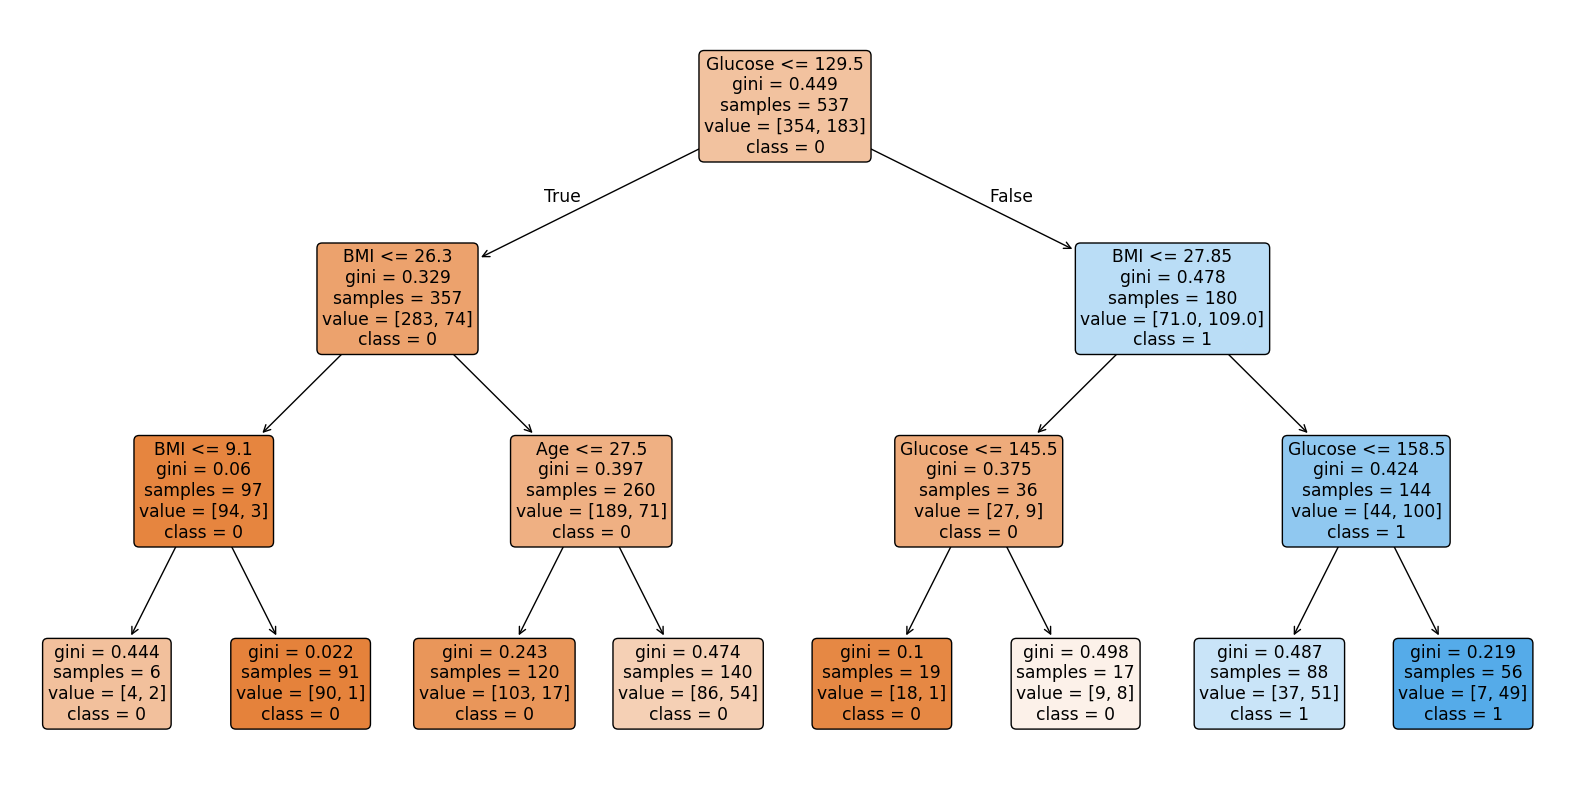

In [11]:
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,rounded=True,feature_names=x_train.columns,class_names=['0','1'])
plt.show()

In [12]:
print("accuracy score",metrics.accuracy_score(y_test,y_pred))
print("precision score",metrics.precision_score(y_test,y_pred))
print("recall score",metrics.recall_score(y_test,y_pred))
print("f1 score",metrics.f1_score(y_test,y_pred))

accuracy score 0.7575757575757576
precision score 0.7164179104477612
recall score 0.5647058823529412
f1 score 0.631578947368421


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))



Accuracy : 0.8138528138528138
Precision: 0.8
Recall   : 0.6588235294117647
F1-score : 0.7225806451612903


| **Metric**    | **Decision Tree** | **Random Forest** |
| ------------- | ----------------- | ----------------- |
| **Accuracy**  | 0.814             | 0.758             |
| **Precision** | 0.800             | 0.716             |
| **Recall**    | 0.659             | 0.565             |
| **F1-score**  | 0.723             | 0.632             |


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [17]:
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]
preds, probas, accs = [], [], []
for m in models:
    m.fit(x_train, y_train)
    p = m.predict(x_test)
    preds.append(p)
    probas.append(m.predict_proba(x_test))
    accs.append(accuracy_score(y_test, p))

# Max Voting
max_vote = np.array([np.bincount(row).argmax() for row in np.column_stack(preds)])

# Average Voting
avg_vote = np.argmax(np.mean(probas, axis=0), axis=1)

# Weighted Voting
weights = np.array(accs) / sum(accs)
weighted_proba = sum(w * p for w, p in zip(weights, probas))
weighted_vote = np.argmax(weighted_proba, axis=1)

# Evaluation function
def eval_model(name, y_pred):
    print(f"{name:<15} Acc={accuracy_score(y_test, y_pred):.3f}  Pre={precision_score(y_test, y_pred):.3f}  Rec={recall_score(y_test, y_pred):.3f}  F1={f1_score(y_test, y_pred):.3f}")

names = ["Logistic", "DecisionTree", "KNN", "MaxVoting", "AvgVoting", "WeightedVoting"]
for n, p in zip(names, preds + [max_vote, avg_vote, weighted_vote]):
    eval_model(n, p)


Logistic        Acc=0.784  Pre=0.778  Rec=0.576  F1=0.662
DecisionTree    Acc=0.710  Pre=0.636  Rec=0.494  F1=0.556
KNN             Acc=0.792  Pre=0.753  Rec=0.647  F1=0.696
MaxVoting       Acc=0.792  Pre=0.794  Rec=0.588  F1=0.676
AvgVoting       Acc=0.753  Pre=0.741  Rec=0.506  F1=0.601
WeightedVoting  Acc=0.766  Pre=0.754  Rec=0.541  F1=0.630


In [18]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Hard Voting
hard_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='hard')
hard_voting.fit(x_train, y_train)
y_pred_hard = hard_voting.predict(x_test)
hard_acc = accuracy_score(y_test, y_pred_hard)

# Soft Voting
soft_voting = VotingClassifier(estimators=[('dt', dt), ('lr', lr), ('knn', knn)], voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
soft_acc = accuracy_score(y_test, y_pred_soft)

print("Hard Voting Accuracy:", hard_acc)
print("Soft Voting Accuracy:", soft_acc)


Hard Voting Accuracy: 0.7922077922077922
Soft Voting Accuracy: 0.7532467532467533


In [21]:
configs = [
    {"n_estimators": 10, "max_depth": None},
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 100, "max_depth": 3},
    {"n_estimators": 100, "max_depth": 5},
]

print("Random Forest Bagging Performance")
for cfg in configs:
    rf = RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={cfg['n_estimators']}, max_depth={cfg['max_depth']} --> Accuracy: {acc:.4f}")


Random Forest Bagging Performance
n_estimators=10, max_depth=None --> Accuracy: 0.7619
n_estimators=50, max_depth=None --> Accuracy: 0.7965
n_estimators=100, max_depth=None --> Accuracy: 0.8139
n_estimators=100, max_depth=3 --> Accuracy: 0.7835
n_estimators=100, max_depth=5 --> Accuracy: 0.7879


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
configs = [10, 50, 100, 200]

print("RandomForestRegressor with OOB Score ")
for n in configs:
    rf = RandomForestRegressor(
        n_estimators=n,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    print(f"n_estimators={n:3} | OOB Score: {rf.oob_score_:.4f} | Test R² Score: {test_r2:.4f}")


RandomForestRegressor with OOB Score 
n_estimators= 10 | OOB Score: 0.0499 | Test R² Score: 0.3416


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators= 50 | OOB Score: 0.1765 | Test R² Score: 0.3940
n_estimators=100 | OOB Score: 0.2035 | Test R² Score: 0.3808
n_estimators=200 | OOB Score: 0.2084 | Test R² Score: 0.3802


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
ada_acc = accuracy_score(y_test, ada.predict(x_test))

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(x_train, y_train)
gb_acc = accuracy_score(y_test, gb_clf.predict(x_test))


xgb = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb.fit(x_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))

cat = CatBoostClassifier(
    iterations=100,
    verbose=0,
    random_state=42
)
cat.fit(x_train, y_train)
cat_acc = accuracy_score(y_test, cat.predict(x_test))


print("\nBoosting Techniques: Classification ")
print(f"AdaBoost Accuracy         : {ada_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"XGBoost Accuracy          : {xgb_acc:.4f}")
print(f"CatBoost Accuracy         : {cat_acc:.4f}")


cal = df
Xr = cal.drop("Outcome",axis=1)
yr = cal["Outcome"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(Xr_train, yr_train)
gbr_r2 = r2_score(yr_test, gbr.predict(Xr_test))

print("\nGradient Boosting: Regression")
print(f"R² Score: {gbr_r2:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Boosting Techniques: Classification 
AdaBoost Accuracy         : 0.7619
Gradient Boosting Accuracy: 0.7965
XGBoost Accuracy          : 0.7576
CatBoost Accuracy         : 0.8052

Gradient Boosting: Regression
R² Score: 0.2447


In [45]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(x_train, y_train)
    end = time.time()

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append([name, train_acc, test_acc, round(end - start, 2)])

df_results = pd.DataFrame(results, columns=['Model', 'Train Acc', 'Test Acc', 'Train Time (s)'])
print(df_results)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              Model  Train Acc  Test Acc  Train Time (s)
0           Bagging   1.000000  0.800866            0.48
1      RandomForest   1.000000  0.813853            0.22
2          AdaBoost   0.800745  0.761905            0.25
3  GradientBoosting   0.934823  0.796537            0.25
4           XGBoost   1.000000  0.757576            0.06
5          CatBoost   0.847300  0.805195            0.18


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from matplotlib.colors import ListedColormap


In [27]:
features = ['Glucose', 'BMI']
models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42)
}


In [40]:
def plot_decision_boundary(model, X, y, title, scaled=False, scaler=None):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaled and scaler:
        grid_scaled = scaler.transform(grid)
        Z = model.predict(grid_scaled)
    else:
        Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolor='k')
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:53:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/

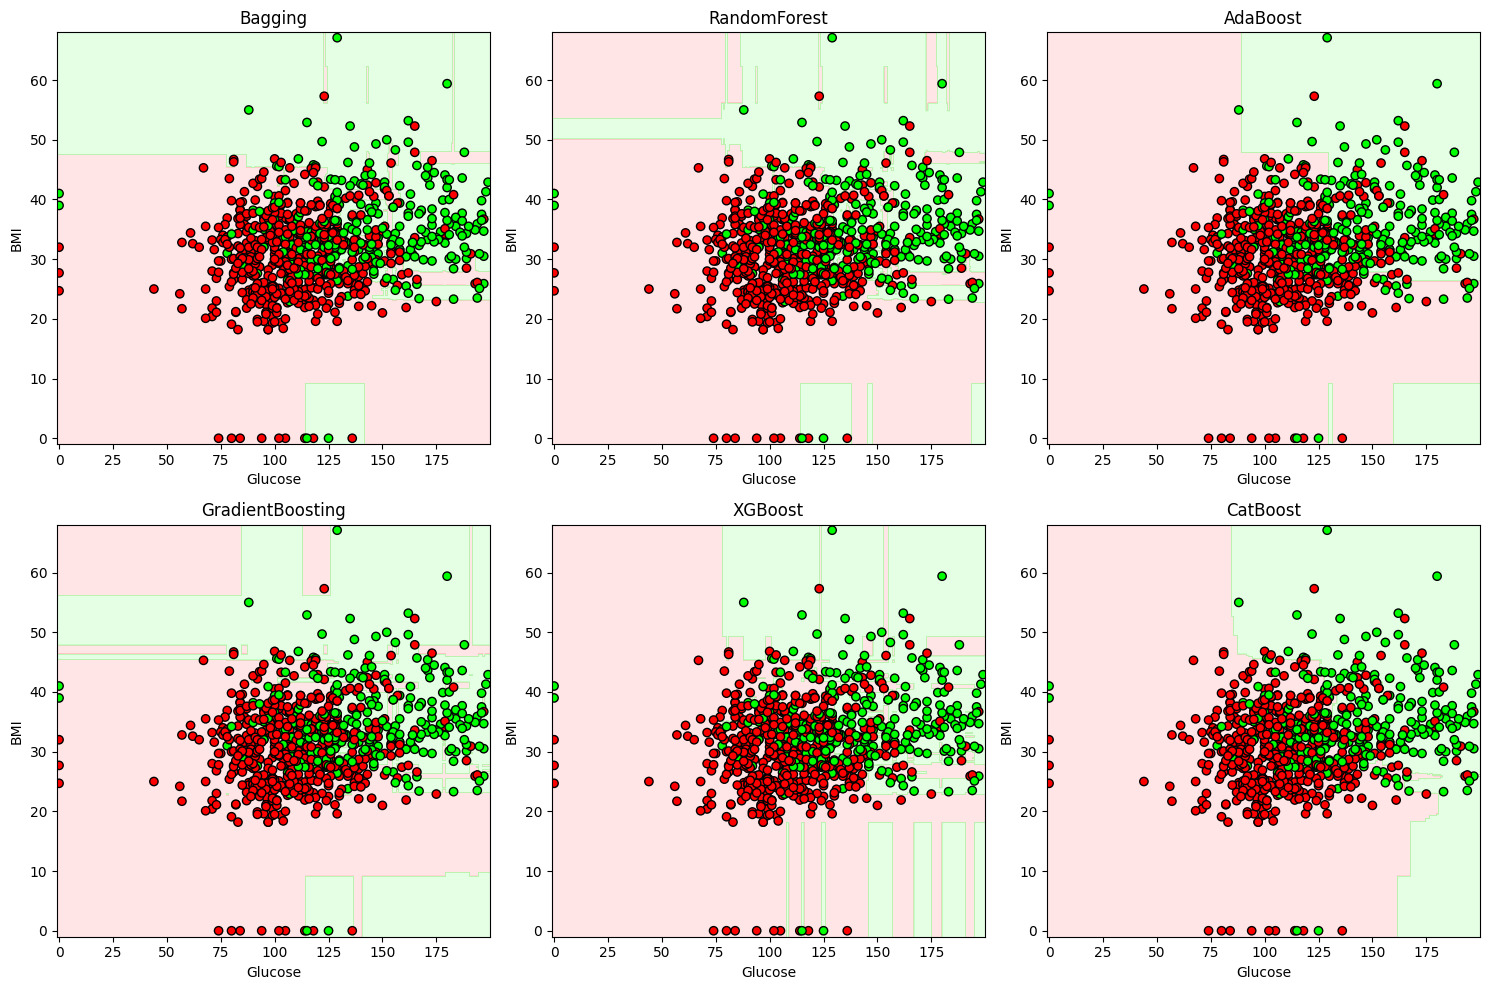

In [41]:
plt.figure(figsize=(15, 10))

# Create a new scaler instance for the two features
scaler_subset = StandardScaler()
X_scaled_subset = scaler_subset.fit_transform(X[features])

# Split the scaled subset data for training and testing
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_scaled_subset, y, test_size=0.3, random_state=1
)

for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 3, i+1)
    # Select only the two features for training the model for plotting
    model.fit(X_train_subset, y_train_subset)
    plot_decision_boundary(model, X[features], y, name, scaled=True, scaler=scaler_subset)


plt.tight_layout()
plt.show()

In [42]:
# Add noise to test data
X_test_noisy = x_test.copy()
X_test_noisy += np.random.normal(0, 10, X_test_noisy.shape)  # Noise with std dev = 10

X_test_noisy_scaled = scaler.transform(X_test_noisy)

print("\n--- Performance with NOISY DATA ---\n")
for name, model in models.items():
    # Re-fit the model on the full training data before evaluating on noisy data
    model.fit(x_train, y_train)
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        y_pred_noisy = model.predict(X_test_noisy_scaled)
    else:
        y_pred_noisy = model.predict(X_test_noisy)
    acc_noisy = accuracy_score(y_test, y_pred_noisy)
    print(f"{name}: Accuracy with noise = {acc_noisy:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



--- Performance with NOISY DATA ---

Bagging: Accuracy with noise = 0.498
RandomForest: Accuracy with noise = 0.528
AdaBoost: Accuracy with noise = 0.632
GradientBoosting: Accuracy with noise = 0.558
XGBoost: Accuracy with noise = 0.632


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:54:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost: Accuracy with noise = 0.632


In [44]:
# Introduce 10% missing values in test set
X_test_missing = pd.DataFrame(x_test.copy()) # Convert to DataFrame
mask = np.random.rand(*X_test_missing.shape) < 0.1
X_test_missing[mask] = np.nan

# Simple imputation: fill missing values with mean
X_test_imputed = X_test_missing.fillna(X_test_missing.mean()) # Use X_test_missing.mean()
X_test_imputed_scaled = scaler.transform(X_test_imputed)


print("\nPerformance with MISSING DATA (after imputation) \n")
for name, model in models.items():
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        y_pred_imp = model.predict(X_test_imputed_scaled)
    else:
        y_pred_imp = model.predict(X_test_imputed)
    acc_imp = accuracy_score(y_test, y_pred_imp)
    print(f"{name}: Accuracy with missing (imputed) = {acc_imp:.3f}")


Performance with MISSING DATA (after imputation) 

Bagging: Accuracy with missing (imputed) = 0.788
RandomForest: Accuracy with missing (imputed) = 0.797
AdaBoost: Accuracy with missing (imputed) = 0.632
GradientBoosting: Accuracy with missing (imputed) = 0.632
XGBoost: Accuracy with missing (imputed) = 0.632
CatBoost: Accuracy with missing (imputed) = 0.632


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


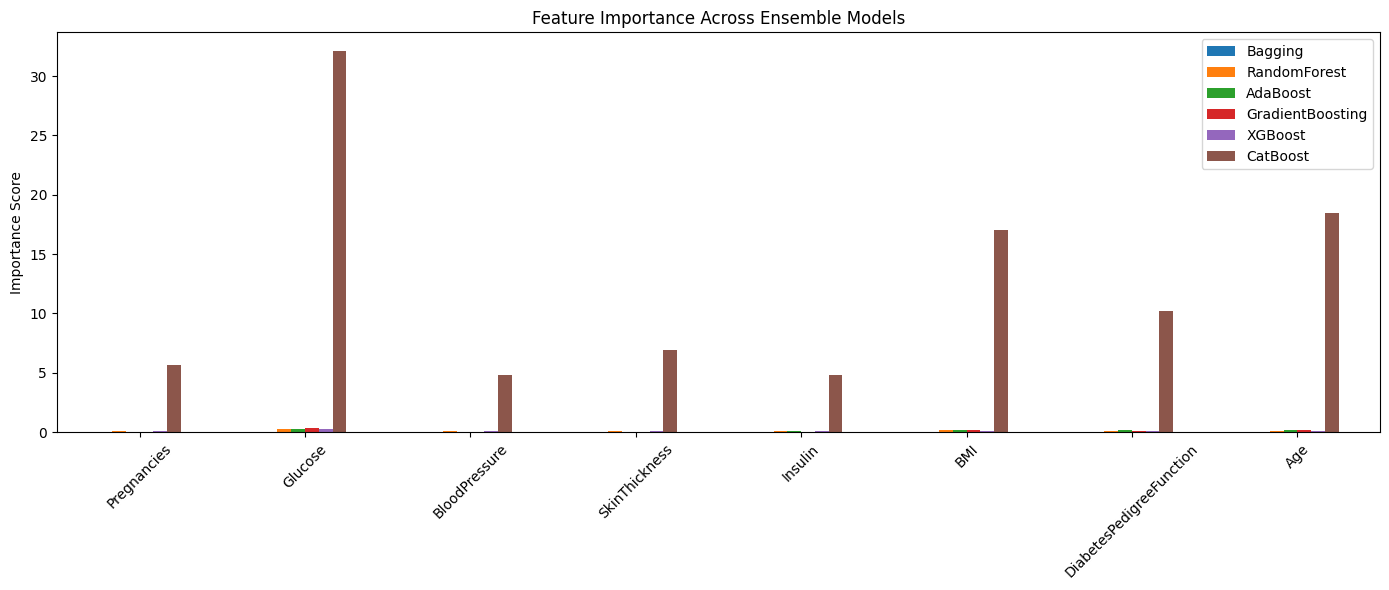

In [35]:
# Reload full dataset (all 8 features)
X_full = df.drop('Outcome', axis=1)
y_full = df['Outcome']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

# Train each model and extract feature importance
importances = {}

for name, model in models.items():
    if name in ["AdaBoost", "GradientBoosting", "XGBoost", "CatBoost"]:
        model.fit(X_train_full_scaled, y_train_full)
    else:
        model.fit(X_train_full, y_train_full)

    if hasattr(model, 'feature_importances_'):
        importances[name] = model.feature_importances_
    else:
        importances[name] = np.zeros(X_full.shape[1])

# Convert to DataFrame
importance_df = pd.DataFrame(importances, index=X_full.columns)
importance_df.plot(kind='bar', figsize=(14, 6))
plt.title("Feature Importance Across Ensemble Models")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.svm import SVC

In [48]:
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(random_state=42, max_iter=500)
svm = SVC(probability=True, random_state=42)


In [49]:
hetero_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)

hetero_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)

hetero_hard.fit(x_train, y_train)
hetero_soft.fit(x_train, y_train)

y_pred_hard = hetero_hard.predict(x_test)
y_pred_soft = hetero_soft.predict(x_test)

acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("Heterogeneous Ensemble (Hard Voting) Accuracy:", round(acc_hard, 3))
print("Heterogeneous Ensemble (Soft Voting) Accuracy:", round(acc_soft, 3))


Heterogeneous Ensemble (Hard Voting) Accuracy: 0.797
Heterogeneous Ensemble (Soft Voting) Accuracy: 0.779


In [51]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "AdaBoost": adaboost,
    "Gradient Boosting": gb
}

print("\nHomogeneous Ensemble Accuracies ")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.3f}")



Homogeneous Ensemble Accuracies 
Bagging: 0.801
Random Forest: 0.814
AdaBoost: 0.762
Gradient Boosting: 0.797


In [53]:
results = pd.DataFrame({
    'Model': ['Hetero Hard', 'Hetero Soft', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [acc_hard, acc_soft] + [
        accuracy_score(y_test, m.predict(x_test)) for m in [bagging, rf, adaboost, gb]
    ]
})

print("\n Final Comparison Table:\n")
print(results.sort_values(by='Accuracy', ascending=False))



 Final Comparison Table:

               Model  Accuracy
3      Random Forest  0.813853
2            Bagging  0.800866
5  Gradient Boosting  0.796537
0        Hetero Hard  0.796537
1        Hetero Soft  0.779221
4           AdaBoost  0.761905


In [56]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score

# Homogeneous Ensembles
models = [
    ('Bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)),
    ('RandomForest', RandomForestClassifier(n_estimators=100))
]

# Heterogeneous Ensembles
base = [
    ('lr', LogisticRegression(max_iter=500)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]
models += [
    ('Voting-Hard', VotingClassifier(estimators=base, voting='hard')),
    ('Voting-Soft', VotingClassifier(estimators=base, voting='soft')),
    ('Stacking', StackingClassifier(estimators=base[:-1], final_estimator=SVC(probability=True)))
]

results = []
for name, model in models:
    start = time.time()
    model.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    results.append([name, acc, time.time() - start])

df = pd.DataFrame(results, columns=['Model','Accuracy','Train Time (s)']).sort_values(by='Accuracy', ascending=False)
print(df)

          Model  Accuracy  Train Time (s)
1  RandomForest  0.800866        0.269323
2   Voting-Hard  0.796537        0.117209
4      Stacking  0.779221        0.172531
0       Bagging  0.774892        0.271883
3   Voting-Soft  0.774892        0.112856
